# **LetsGrowMore**

---



---
# ***Data Science Internship***

---



---

## `Author: UMER FAROOQ`
## `Task Level: Beginner Level`
## `Task Number: 3`
## `Task Title: Stock Market Prediction Using Stacked LSTM`


## `Language: Python`
## `IDE: Google Colab`

# **Introduction:**

---



---


***Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on a financial exchange.***



---



---

I have used Apple (AAPL) dataset, that i have already downloaded and will be availble with this repository. You can also access Apple Stock data from this API: The API Key can be generated from : https://www.tiingo.com/

---

---





# **Step:1**
***Importing Libraries***

In [9]:
import warnings
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import numpy as np
from numpy import array
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

warnings.filterwarnings('ignore')

# **Step:2**

**DATA LOADING:**

In [2]:
df=pd.read_csv('AAPL.csv')

In [3]:
df.head() # Reading the first 5 rows

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df.tail() # reading the last records of the file

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [5]:
df1 = df.reset_index()['close']

In [6]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

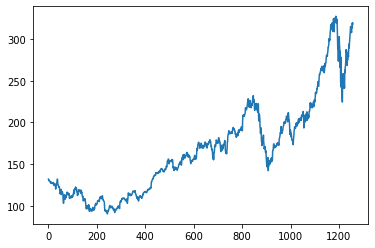

In [7]:
plt.plot(df1)



```
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
```



In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


# **Step:3**

**Splitting, Training and Testing Dataset:**

In [12]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
print("Training data size is {} , Test size is {} , Trained Data is:\n {} ".format(training_size,test_size, train_data))

Training data size is 817 , Test size is 441 , Trained Data is:
 [[0.17607447]
 [0.17495567]
 [0.16862282]
 [0.1696994 ]
 [0.16727181]
 [0.16794731]
 [0.16473866]
 [0.16174111]
 [0.1581525 ]
 [0.15654817]
 [0.16271215]
 [0.1614878 ]
 [0.1554927 ]
 [0.15443722]
 [0.15730811]
 [0.15604154]
 [0.15849025]
 [0.15308621]
 [0.15735033]
 [0.15490163]
 [0.15946129]
 [0.15688592]
 [0.1537195 ]
 [0.14434687]
 [0.14812547]
 [0.15308621]
 [0.15241071]
 [0.15055307]
 [0.14924428]
 [0.13607194]
 [0.12551718]
 [0.13906949]
 [0.14911762]
 [0.14890653]
 [0.15401503]
 [0.16115005]
 [0.16583636]
 [0.17618002]
 [0.17060711]
 [0.14725998]
 [0.14700667]
 [0.14422021]
 [0.13691632]
 [0.13949168]
 [0.13784514]
 [0.13522756]
 [0.13071012]
 [0.11863548]
 [0.10259225]
 [0.1058009 ]
 [0.10466098]
 [0.10630752]
 [0.12403952]
 [0.09773706]
 [0.10512539]
 [0.10474542]
 [0.10816516]
 [0.11323144]
 [0.11044499]
 [0.10415435]
 [0.09419066]
 [0.06510175]
 [0.05395592]
 [0.0565735 ]
 [0.08169383]
 [0.09533058]
 [0.0968926

Convert an Array of Values into a Dataset Matrix:

In [19]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

**Reshape into X=t,t+1,t+2,t+3 and Y=t+4**

In [20]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [24]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

**Reshape input to be [samples, time steps, features] which is required for LSTM**

In [25]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# **CREATE STACKED LSTM MODEL:**

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 281ms/step - loss: 0.0139 - val_loss: 0.0714
Epoch 2/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0037 - val_loss: 0.0052
Epoch 3/100
12/12 [==============================] - 2s 189ms/step - loss: 0.0012 - val_loss: 0.0043
Epoch 4/100
12/12 [==============================] - 2s 189ms/step - loss: 7.7508e-04 - val_loss: 0.0042
Epoch 5/100
12/12 [==============================] - 2s 187ms/step - loss: 6.5213e-04 - val_loss: 0.0051
Epoch 6/100
12/12 [==============================] - 2s 187ms/step - loss: 6.2866e-04 - val_loss: 0.0043
Epoch 7/100
12/12 [==============================] - 2s 187ms/step - loss: 6.3394e-04 - val_loss: 0.0051
Epoch 8/100
12/12 [==============================] - 2s 188ms/step - loss: 6.0559e-04 - val_loss: 0.0059
Epoch 9/100
12/12 [==============================] - 2s 189ms/step - loss: 5.8878e-04 - val_loss: 0.0039
Epoch 10/100
12/12 [==============================] - 2s 187ms/step

**Lets Do the prediction and check performance metrics:**

In [31]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

**Transformback to original form:**

In [32]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

**Calculate RMSE Performance Metrics:**

In [33]:
math.sqrt(mean_squared_error(y_train,train_predict))

0.012799960922594108

**Test Data RMSE:**

In [34]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.030563182627625494

# **PLOTTING:**

**Shift train predictions for plottin:**

In [35]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

**Shift test predictions for plotting:**

In [36]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

**Plot baseline and predictions:**

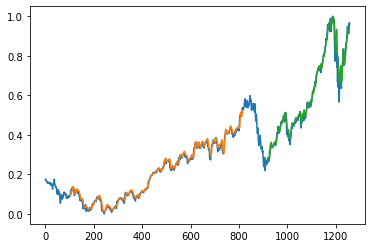

In [37]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

441

In [39]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [42]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8583551465000421,
 0.886641898167694,
 0.8743139407244787,
 0.8843198513890063,
 0.8783669678290973,
 0.8986321033521911,
 0.9258211601790087,
 0.928776492442793,
 0.9567677108840664,
 0.9386979650426412,
 0.9330406147091108,
 0.9495060373216246,
 0.9642404796082074,
 0.9551211686228152,
 0.9598919192772102,
 0.9663514312251964,
 0.9624672802499366,
 0.9229502659799036,
 0.9598497002448703,
 0.987925356750823,
 0.9859410622308538,
 0.9253145317909313,
 0.9217259140420502,
 0.9647471079962848,
 0.9757240564046272,
 0.991598412564384,
 0.9697289538123786,
 0.9761462467280251,
 0.967955754454108,
 1.0,
 0.9901629654648316,
 0.9905007177235496,
 0.9653803934813814,
 0.9848855864223591,
 0.9708688676855526,
 0.9402600692392131,
 0.8774803681499619,
 0.8348391454867854,
 0.8541332432660642,
 0.7733682344000674,
 0.7726927298826312,
 0.8801401671873681,
 0.840074305496918,
 0.896732246896901,
 0.8552731571392385,
 0.8388499535590643,
 0.7423372456303302,
 0.8232711306256859,
 0.78143206957

In [43]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.96376127]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

In [44]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

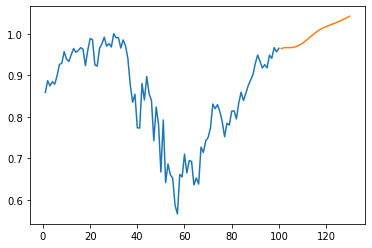

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

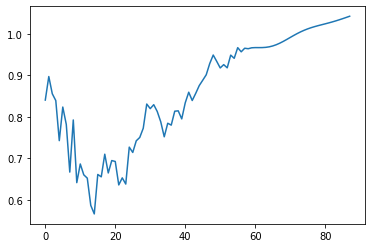

In [46]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

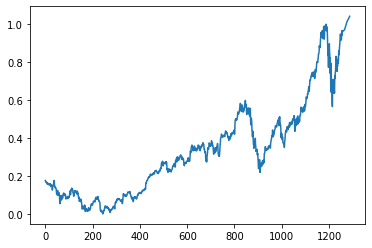

In [48]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)